## Exercise on Machine Learning 101 - Part 1
---
<div style="font-size: 20px">
  Group:
  <br>
  Homework H 
  <br>
  Created by: Muazzam Bin Aqeel & Wesley dos santos Barisch
</div>

---
Instructions are given in <span style="color:blue">blue</span> color.

In this exercise, we will be looking at clinical data from patients that suffered from some type of cardiovascular disease (e.g., heart attack), which may or may not have caused the patient's death (heart failure).

Our objective is to train a classifier that predicts under which circumstances a cardiovascular disease is most likely to be fatal.

* <div style="color:blue">The folder <code>/data</code>, next to this exercise, contains the file <code>Heart_Failure.csv</code>. Your first task will be to read the data into a <code>DataFrame</code>. Make sure to import any necessary libraries, too.</div>

In [15]:
# Libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



The following is needed for **reproducibility** (see [here](https://www.mikulskibartosz.name/how-to-set-the-global-random_state-in-scikit-learn/), but also [here](https://scikit-learn.org/stable/faq.html#how-do-i-set-a-random-state-for-an-entire-execution)):

In [16]:
np.random.seed(42)

In [17]:
# Your solution goes here:
file_path = 'data/Heart_Failure.csv'
heart_failure_data = pd.read_csv(file_path)

* <div style="color:blue">Familiarize yourself with the data. Print out the first 5 rows of the <code>DataFrame</code>.</div>

In [18]:
table = heart_failure_data.head().style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('font-size', '12pt'), ('text-align', 'center')]
    },
    {
        'selector': 'td',
        'props': [('text-align', 'center')]
    }]
).set_properties(**{'background-color': 'gray', 'color': 'white'}).hide(axis='index')

table


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,4,1
55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6,1
65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,7,1
50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,7,1
65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,8,1


* <div style="color:blue">Find out how many samples the <code>DataFrame</code> contains.</div>

In [19]:
# Your solution goes here:
number_of_samples = heart_failure_data.shape[0]
print("The following are the number of samples in the DataFrame: " + str(number_of_samples))

The following are the number of samples in the DataFrame: 299


As for the different features and labels, and what their respective meanings are:

* **`age`** - patient's age at the time of heart failure
* **`anaemia`** - decrease of red blood cells or hemoglobin (boolean)
* **`creatinine_phosphokinase`** - level of the CPK enzyme in the blood (mcg/L)
* **`diabetes`** - if the patient has diabetes (boolean)
* **`ejection_fraction`** - percentage of blood leaving the heart at each contraction
* **`high_blood_pressure`** - if the patient has hypertension (boolean)
* **`platelets`** - platelets in the blood (kiloplatelets/mL)
* **`serum_creatinine`** - level of serum creatinine in the blood (mg/dL)
* **`serum_sodium`** - level of serum sodium in the blood (mEq/L)
* **`sex`** - patients's sex (binary: '0' - female or '1' - male)
* **`smoking`** - if the patient smokes (boolean)
* **`time`** - follow-up period (days)
* **`DEATH_EVENT`** - if the patient deceased during the follow-up period (boolean)

In regards to cleaning the data, there is not much left to do for you, except for removing unneeded columns.

* <div style="color:blue">Remove the <code>time</code> column from the <code>DataFrame</code>.</div>

In [20]:
heart_failure_data_cleaned = heart_failure_data.drop('time', axis=1)
heart_failure_data_cleaned.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


* <div style="color:blue">Split your data into a training set (containing 75% of the original data) and a testing set (including 25% of the original data). Furthermore, make sure that the label values' distribution is the same for all your sub-sets (<code>DEATH_EVENT</code>).</div>

In [21]:
# Your solution goes here:
X = heart_failure_data.drop(columns=['DEATH_EVENT'])
y = heart_failure_data['DEATH_EVENT']
# Spliting  the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# Checking the distribution of DEATH_EVENT in training and testing sets
print("Training set DEATH_EVENT distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set DEATH_EVENT distribution:")
print(y_test.value_counts(normalize=True))


Training set DEATH_EVENT distribution:
DEATH_EVENT
0    0.678571
1    0.321429
Name: proportion, dtype: float64

Testing set DEATH_EVENT distribution:
DEATH_EVENT
0    0.68
1    0.32
Name: proportion, dtype: float64


* <div style="color:blue">Follow the suggestions of <b><a html="https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">this</a></b> cheat sheet to select an estimator that fits the problem and the data.</div>
* <div style="color:blue">Remember that we are trying to find out what combination of feature observations will result in a <code>DEATH_EVENT</code>.</div>
* <div style="color:blue">Create an instance of the respective model with the help of <code>scikit-learn</code>.</div>

**Note**: If your model selection process proposes an estimator you are not yet familiar with, try to remember the general **fit-predict-paradigm** utilized by `scikit-learn`. Also, keep in mind that the documentation provides plentiful information about each classifier, including a list of parameters and default values.

In [22]:
# Your solution goes here:
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model = LogisticRegression(C=1.0, max_iter=100, random_state=42)

* <div style="color:blue">Train the model, using your training data.</div>

In [23]:
# Your solution goes here:
logistic_regression_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

* <div style="color:blue">Use your trained model to make predictions on the <b>test</b> set.</div>

In [24]:
# Your solution goes here:
# Use the trained model to make predictions on the test set
predictions = logistic_regression_model.predict(X_test)


* <div style="color:blue">Derive the accuracy metric from your predictions.</div>

In [25]:
# Your solution goes here:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8266666666666667


* <div style="color:blue">Plot a confusion matrix that shows the number of predicted labels in comparison to the actual labels.</div>

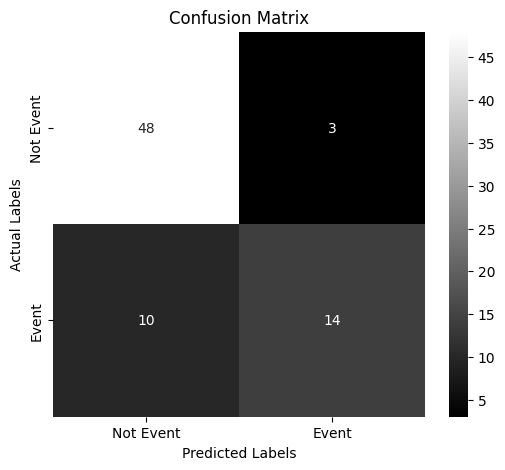

In [26]:
# Your solution goes here:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="gray", 
            xticklabels=['Not Event', 'Event'], 
            yticklabels=['Not Event', 'Event'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


* <div style="color:blue">Use the confusion matrix to fill out the following table:</div>

||**True Positive**|**True Negative**|**False Positive**|**False Negative**|
|-|:-:|:-:|:-:|:-:|
|Number of Predictions|14|48|3|10|

* <div style="color:blue">Generate a classification report for your model.</div>

**Note**: Depending on your classifier, your chosen parameters, or due to random effects, a warning message might pop up that says: `Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.` Please ignore this message for now and possibly make use of it when evaluating your model.

In [27]:
report_dict = classification_report(y_test, predictions, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print("Classification Report:")
report_df


Classification Report:


,precision,recall,f1-score,support
0,0.827586,0.941176,0.880734,51.000000
1,0.823529,0.583333,0.682927,24.000000
accuracy,0.826667,0.826667,0.826667,0.826667
macro avg,0.825558,0.762255,0.781830,75.000000
weighted avg,0.826288,0.826667,0.817436,75.000000


* <div style="color:blue">Use the derived metrics (accuracy, confusion matrix, precision, recall, f1-score) to critically evaluate your model's quality. Is it well suited to fulfill its initial purpose?</div>

**Note**: Before you start working on your answer, have a look at [this](https://ml-cheatsheet.readthedocs.io/en/latest/glossary.html#) website and search for the term **Null Accuracy**. Use the definition to support your discussion.

<div style="color:green">The logistic regression model boasts an accuracy of about 82.67%, with impressive precision for predicting non-events, indicated by a 94.12% recall. However, it falls short in detecting actual heart failure events, with only a 58.33% recall. This discrepancy is critical in a clinical setting, where missing true events could be grave. Despite a strong precision that minimizes false positives, the model's failure to identify nearly half of the true heart failure cases calls for urgent refinement. The disparity between the F1-scores for non-events (approximately 88.07%) and events (approximately 68.29%) suggests the need for improvement. Given the stakes of heart failure prediction, the model, as it stands, may not be adequate for clinical use. Prioritizing the improvement of recall for events is essential, even if it affects precision. Additionally, assessing the model against null accuracy will help verify its practical value beyond naive predictions.</div>


**Final Remark:** We are trying to give you a realistic indication of what you might expect when tackling data science tasks ... So, you might now either be put off in this particular case OR ready to plough on, maybe after having worked on the second one of this week's exercises and try another classifier which seems more promising (you might also want to follow the cheat sheet for algorithm selection a little further) ...

In [28]:
# Ok, I'm ploughing on and I am giving this another try ... (maybe)